## 『本次練習內容』
#### 學習如何運用NMS來過濾預測框

## 『本次練習目的』
  #### 了解NMS是如何運作的
  #### 了解為什麼需要NMS來完成最終輸出結果

##### source:https://github.com/amusi/Non-Maximum-Suppression

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def NMS( Bounding_Boxes, Confidence_Score, Threshold ):
    # If no bounding boxes, return empty list
    if len( Bounding_Boxes ) == 0:
        return [], []

    # 每個 BBOX 的 x1,y1,x2,y2
    Boxes = np.array( Bounding_Boxes )
    start_x = Boxes[:, 0]
    start_y = Boxes[:, 1]
    end_x = Boxes[:, 2]
    end_y = Boxes[:, 3]

    # Confidence scores of bounding boxes
    score = np.array( Confidence_Score )

    # 用來保存經過篩選的 BBOX 
    picked_boxes = []
    picked_score = []

    
    # 計算每一個 BBOX 的面積
    areas = (end_x-start_x+1)*(end_y-start_y+1)
    # 排序 BBOX 的分數
    order = np.argsort(score)
    print(order)

    # Iterate bounding boxes
    while order.size > 0:
        
        # The index of the largest confidence score
        index = order[-1]

        # Pick the bounding box with the largest confidence score
        picked_boxes.append( Bounding_Boxes[index] )
        picked_score.append( Confidence_Score[index] )

        # Compute ordinates of intersection-over-union(IOU)
        x1 = np.maximum( start_x[index], start_x[order[:-1]] )
        x2 = np.minimum( end_x[index], end_x[order[:-1]] )
        y1 = np.maximum( start_y[index], start_y[order[:-1]] )
        y2 = np.minimum( end_y[index], end_y[order[:-1]] )

        # Compute areas of intersection-over-union
        w = np.maximum( 0.0, x2-x1+1 )
        h = np.maximum( 0.0, y2-y1+1 )
        intersection = w*h

        '''計算IOU'''
        ratio = intersection/(areas[index]+areas[order[:-1]]-intersection)
        
        '''重疊率小於預測threshold的Boxes要保存下來'''
        left = np.where( ratio<threshold )
        order = order[left]

    return picked_boxes, picked_score

## 讀取圖片

In [3]:
img_path = 'D:/Tom/GitHub/DL_CVMarathon/IMAGE/Day_028/nms.jpg' 
img_bgr = cv2.imread( img_path )
#img_rgb = img_bgr[ :,:,::-1 ]

# Copy image as original
org = img_bgr.copy()

## 參數設置

In [4]:
# Bounding Boxes
bounding_boxes = [(200, 82, 350, 317), (180, 67, 305, 282), (200, 90, 368, 304)]
confidence_score = [0.9, 0.75, 0.8]

# IoU Threshold(重疊超過多少就過濾掉)
threshold = 0.5

In [5]:
# Draw parameters
font = cv2.FONT_HERSHEY_SIMPLEX
font_scale = 1
thickness = 2

## 未做 NMS

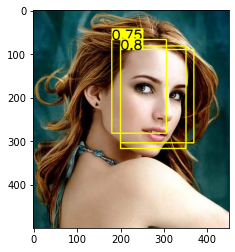

In [6]:
# Draw bounding boxes and confidence score
for ( start_x, start_y, end_x, end_y ), confidence in zip( bounding_boxes, confidence_score ):
    (w, h), baseline = cv2.getTextSize( str(confidence), font, font_scale, thickness )
    cv2.rectangle( org, ( start_x, start_y-(2*baseline+5) ), ( start_x+w, start_y ), (0,255,255), -1 )
    cv2.rectangle( org, ( start_x, start_y ), ( end_x, end_y ), (0,255,255), 2 )
    cv2.putText( org, str(confidence), ( start_x, start_y ), font, font_scale, (0,0,0), thickness )
    
# Show image
plt.imshow( org[ :,:,::-1 ] )
plt.show()

## 執行 NMS 後

[1 2 0]


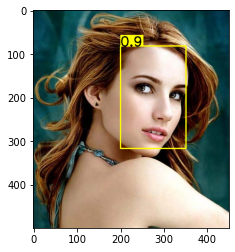

In [7]:
# Run non-max suppression algorithm
picked_boxes, picked_score = NMS( bounding_boxes, confidence_score, threshold )

# Draw bounding boxes and confidence score after non-maximum supression
for ( start_x, start_y, end_x, end_y ), confidence in zip( picked_boxes, picked_score ):
    (w, h), baseline = cv2.getTextSize(str(confidence), font, font_scale, thickness)
    cv2.rectangle( img_bgr, ( start_x, start_y-(2*baseline+5) ), ( start_x+w, start_y ), (0,255,255), -1 )
    cv2.rectangle( img_bgr, ( start_x, start_y ), ( end_x, end_y ), (0,255,255), 2 )
    cv2.putText( img_bgr, str(confidence), ( start_x, start_y ), font, font_scale, (0,0,0), thickness )

plt.imshow( img_bgr[ :,:,::-1 ] )
plt.show()

## 兩者比較

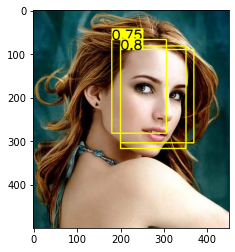

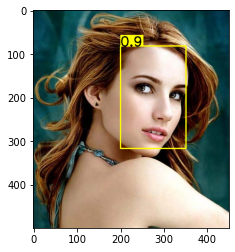

In [8]:
# Show image
plt.imshow(org[:,:,::-1])
plt.show()
plt.imshow(img_bgr[:,:,::-1])
plt.show()